# 下準備

In [10]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [11]:
# Googleドライブをマウント
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Excelファイルを読み込み、データフレームに格納
df = pd.read_csv("/content/drive/MyDrive/カスタムデータセット/data.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   能力評価      5000 non-null   float64
 1   性格診断結果    5000 non-null   int64  
 2   思索型:内閉性   5000 non-null   float64
 3   自制型:弱気さ   5000 non-null   float64
 4   従順性       5000 non-null   float64
 5   ﾓﾗﾄﾘｱﾑ傾向  5000 non-null   float64
 6   自己信頼性     5000 non-null   float64
 7   努力型:持続性   5000 non-null   float64
 8   積極性       5000 non-null   float64
 9   協調性       5000 non-null   float64
 10  共感性       5000 non-null   float64
 11  努力型:規則性   5000 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 468.9 KB


# 深層学習モデル

In [9]:
#!pip install tensorflow

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [15]:
# 特徴量と目的変数の設定
X = df.drop('能力評価', axis=1)
y = df['能力評価']

# データの標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

**深層学習モデルの構造を決定します。**


*   Dense：全結合層
*   Dropout：ドロップアウト層（指定の割合でノードを削除します）



In [17]:
# モデルの構築
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# モデルのコンパイル
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# EarlyStoppingコールバックの設定（終了条件の設定）
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# モデルの訓練
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.8967 - mean_absolute_error: 1.4401 - val_loss: 1.3578 - val_mean_absolute_error: 1.0077
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2276 - mean_absolute_error: 0.8789 - val_loss: 1.2267 - val_mean_absolute_error: 0.9768
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8294 - mean_absolute_error: 0.7252 - val_loss: 0.8286 - val_mean_absolute_error: 0.7848
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6066 - mean_absolute_error: 0.6171 - val_loss: 0.5717 - val_mean_absolute_error: 0.6246
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4838 - mean_absolute_error: 0.5442 - val_loss: 0.4449 - val_mean_absolute_error: 0.5136
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3837 - mean_absolute_error: 0.4750 - val_loss: 0.3264 - val_mean_absolute_error: 0.3832
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3344 - mean_absolute_error: 0.4

In [19]:
# モデルの評価
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test set: {mae}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2805 - mean_absolute_error: 0.3881  
Mean Absolute Error on test set: 0.3814810514450073


**構築したモデルを可視化します**

In [20]:
#!pip install pydot
#!pip install graphviz

In [21]:
from tensorflow.keras.utils import plot_model

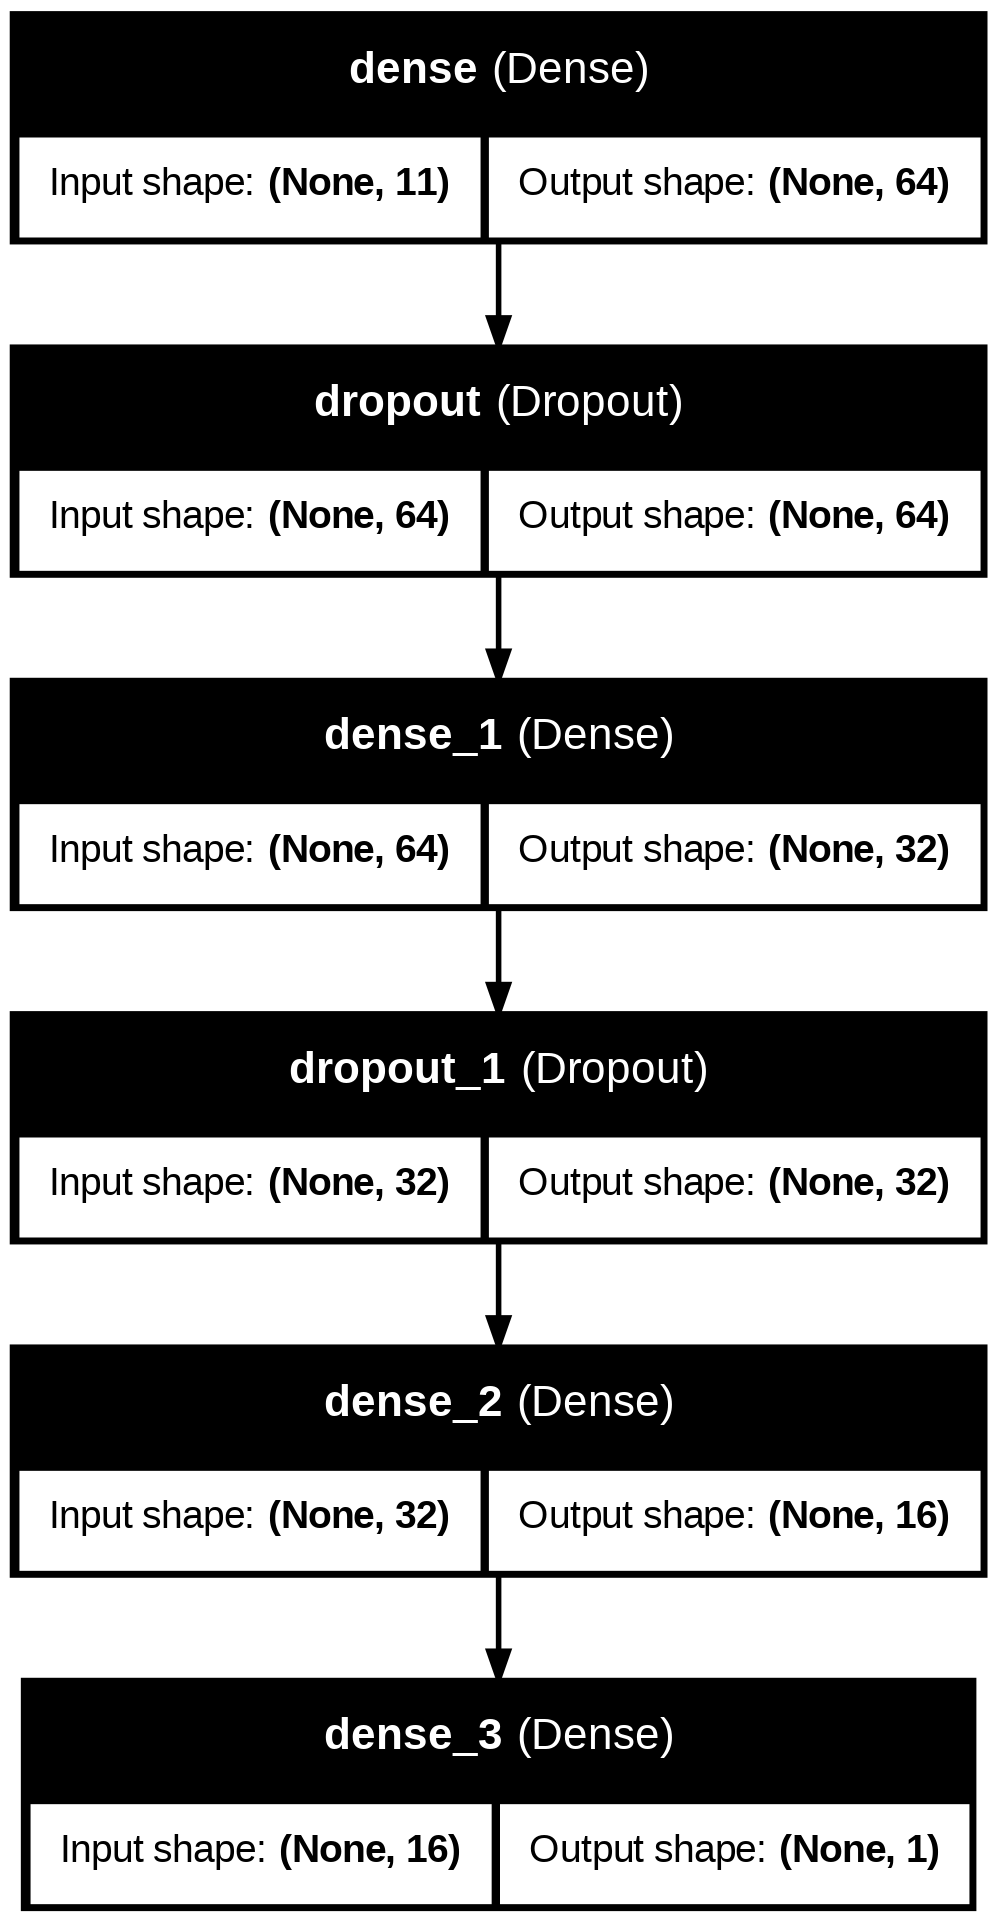

In [22]:
# モデルの図示
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

**過学習の兆候を見るために、訓練時と評価時の評価指標をプロットし、どの程度乖離しているかを見ます**

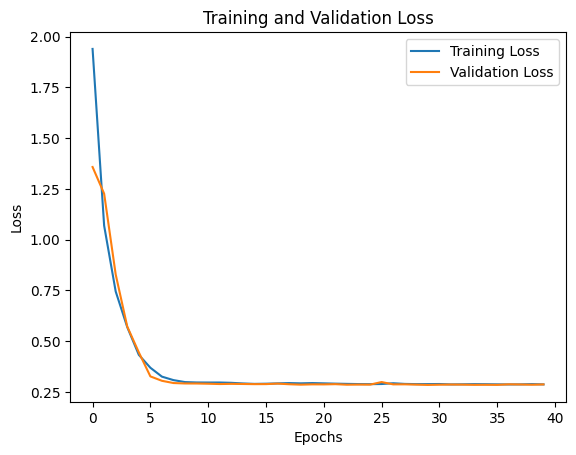

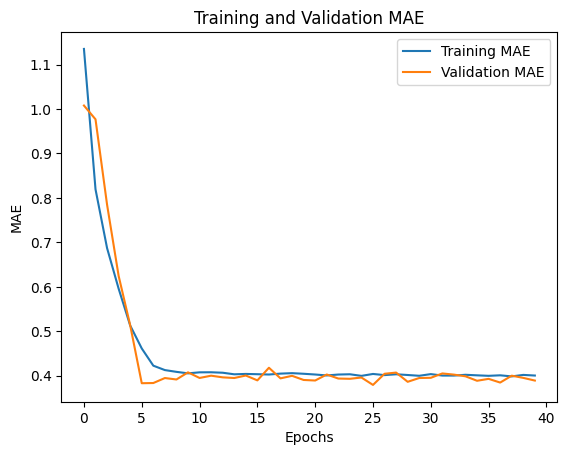

In [23]:
# 学習曲線のプロット
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()